Load dataset 

In [41]:
import pandas as pd

# Load the SMS data, skipping bad lines
df = pd.read_csv('SMS', sep='\t', header=None, names=['label', 'message'], on_bad_lines='warn')

# Display the first few rows of the dataframe
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


Data processing 

we start by removing unnecessary columns

In [42]:
df.loc [:,'label'] = df['label'].map({'ham': 0, 'spam': 1})

df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
# Display the number of rows and columns in the dataframe
df.shape

(5572, 2)

In [44]:
#count spam and ham
label_count = df['label'].value_counts()

#display the results
print(label_count)

label
0    4825
1     747
Name: count, dtype: int64


Split Data into Training and Test set


In [45]:
from sklearn.model_selection import train_test_split

#conert label column to numeric type
df['label'] = pd.to_numeric(df['label'])

x_train,x_test,y_train,y_test = train_test_split(df['message'],df['label'],test_size=0.2,random_state=42)

print(f'Training size:', len(x_train), 'Testing size:', len(x_test))

Training size: 4457 Testing size: 1115


Convert text to numeric values

In [46]:
#convert text to numeric features
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

#train the model
model = MultinomialNB()
model.fit(x_train_vec, y_train)


MultinomialNB()

In [22]:
#predict on test data
y_pred = model.predict(x_test_vec)

#evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9919282511210762
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



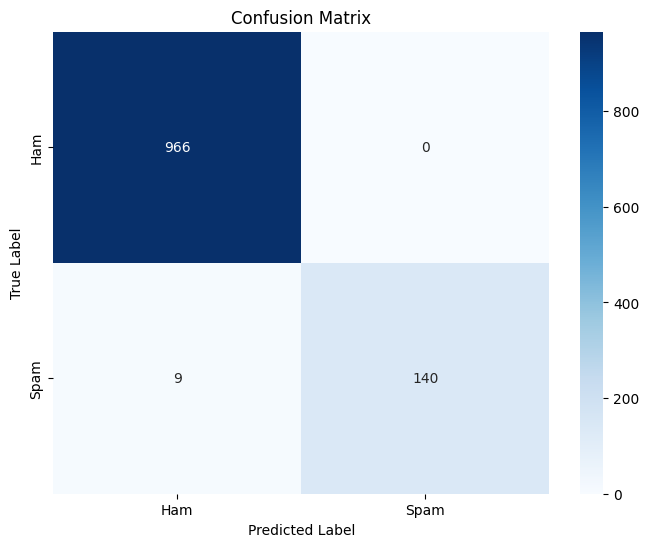

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#plot confusion matrix  
cm = confusion_matrix(y_test, y_pred)

#create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])

#add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

#show the plot
plt.show()

In [33]:
#sample message
new_text = ["Forward this message to 10 friends to receive good luck and fortune!"]

new_text_vec = vectorizer.transform(new_text)

prediction = model.predict(new_text_vec)

if prediction[0] == 0:
    print("The message is classified as Ham")
else:
    print("The message is classified as Spam")

The message is classified as Ham
